In [2]:
print("Hello")

Hello


In [1]:
!pip install TensorFlow==2.12.1

In [3]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("test.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 2s 2s/step
Class: توتيات
Confidence Score: 0.999925


1/1 [==============================] - 1s 1s/step
الصنف المتوقع: 0 توتيات
نسبة الثقة: 0.9983


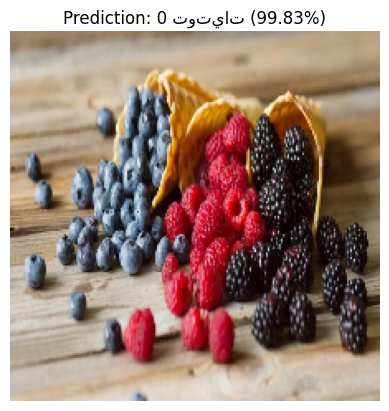

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# تحميل النموذج
model = tf.keras.models.load_model("keras_model.h5")

# تحميل labels
with open("labels.txt", "r") as f:
    labels = f.read().splitlines()

# تحميل الصورة
img_path = "test.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# التنبؤ
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions[0])
predicted_label = labels[predicted_index]
confidence = predictions[0][predicted_index]

# عرض النتيجة
print(f"الصنف المتوقع: {predicted_label.strip()}")
print(f"نسبة الثقة: {confidence:.4f}")
plt.imshow(img)
plt.title(f"Prediction: {predicted_label.strip()} ({confidence:.2%})")
plt.axis('off')
plt.show()

**عبير سحمان الأسمري**